In [0]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Load train_data only to keep the num_train 
df_train_data = pd.read_csv('/content/drive/My Drive/IHU/NLP/Coursework/data/train.csv', encoding="ISO-8859-1")

#keep the number of lines for train tupples
#in order to split them again later 
num_train = df_train_data.shape[0]

In [0]:
#Load features from features.csv
df_features = pd.read_csv('/content/drive/My Drive/IHU/NLP/Coursework/features.csv', encoding="ISO-8859-1")

In [0]:
#Create the df_train dataframe
#num_train takes its part now in this step 

df_train = df_features.iloc[:num_train]

In [0]:
#Create X and y from df train 

y = df_train['relevance'].values
X = df_train.drop(['id','relevance',],axis=1).values

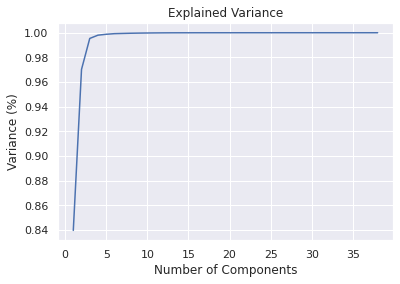

In [0]:
#PCA
#This graph will help us determine the number of componets

x_axis = [i for i in range(1,X.shape[1]+1)]

pca_n_comp = PCA().fit(X)

ax = sns.lineplot(x=x_axis, y=np.cumsum(pca_n_comp.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [0]:
#Variance of original data preserved using 5 components

exp_var = (pca_n_comp.explained_variance_ratio_)
sum_exp_var = 0 
for i in range (0,4):
  sum_exp_var = sum_exp_var + exp_var[i]
print(str(sum_exp_var) + "% of the total variance of the original data is preserved using 5 components")

0.9980317844051395% of total variance of the original data is preserved using 5 components


In [0]:
# PCA XGBoost 

#XGBoost with best parameters
model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7, silent=True) #XGBOOST

scores_pca = []
n_of_comps = []

for i in tqdm(range(38, 0, -1)):
  pca = PCA(n_components=i)
  principal_components_var = pca.fit_transform(X)
  scores = []
  scores = cross_validate(model, principal_components_var , y ,scoring = make_scorer(mean_squared_error) ,cv=20, verbose=1 )
  n_of_comps.append(i)
  scores_pca.append(sqrt(np.mean(scores['test_score']))) 

scores_pca



  0%|          | 0/38 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.6min finished


  3%|▎         | 1/38 [14:35<9:00:09, 875.94s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.0min finished


  5%|▌         | 2/38 [28:34<8:38:51, 864.77s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 13.9min finished


  8%|▊         | 3/38 [42:30<8:19:21, 856.05s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 13.3min finished


 11%|█         | 4/38 [55:46<7:54:57, 838.17s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 12.1min finished



[0.46640543326941647,
 0.4665551176701511,
 0.46654654372126914,
 0.46634536148862793,
 0.46632323083615557,
 0.4665366939523351,
 0.46621271934083536,
 0.46661723899268115,
 0.4667598075401769,
 0.4666275951746722,
 0.46670259224913596,
 0.46697208695225345,
 0.46703391285447604,
 0.46698184095355966,
 0.467258853889979,
 0.4671999419632377,
 0.4672800535246265,
 0.4675240180679242,
 0.4677339377539722,
 0.4678980693259422,
 0.4681503504067656,
 0.46851016645210014,
 0.46973790138075006,
 0.47077463485460697,
 0.4719910057062082,
 0.47714872943507913,
 0.47861689460363055,
 0.4789063978761913,
 0.47990088465517866,
 0.4803707033821108,
 0.4825798350297967,
 0.4871672363046757,
 0.49018060041870876,
 0.5071623587589749,
 0.5195850332594536,
 0.5212505861654695,
 0.527912647026527,
 0.5335471373023967]

In [0]:
#Create a dictionary with the results 
result_dict = {}
for i in range(0,len(scores_pca)):
  result_dict[str(n_of_comps[i])+ " components"] = scores_pca[i]

#Sort the results by value
results_sorted = [(k, v) for k, v in sorted(result_dict.items(), key=lambda x: x[1], reverse=False)]

#Lets have a look
results_sorted

[('32 components', 0.46621271934083536),
 ('34 components', 0.46632323083615557),
 ('35 components', 0.46634536148862793),
 ('38 components', 0.46640543326941647),
 ('33 components', 0.4665366939523351),
 ('36 components', 0.46654654372126914),
 ('37 components', 0.4665551176701511),
 ('31 components', 0.46661723899268115),
 ('29 components', 0.4666275951746722),
 ('28 components', 0.46670259224913596),
 ('30 components', 0.4667598075401769),
 ('27 components', 0.46697208695225345),
 ('25 components', 0.46698184095355966),
 ('26 components', 0.46703391285447604),
 ('23 components', 0.4671999419632377),
 ('24 components', 0.467258853889979),
 ('22 components', 0.4672800535246265),
 ('21 components', 0.4675240180679242),
 ('20 components', 0.4677339377539722),
 ('19 components', 0.4678980693259422),
 ('18 components', 0.4681503504067656),
 ('17 components', 0.46851016645210014),
 ('16 components', 0.46973790138075006),
 ('15 components', 0.47077463485460697),
 ('14 components', 0.4719910

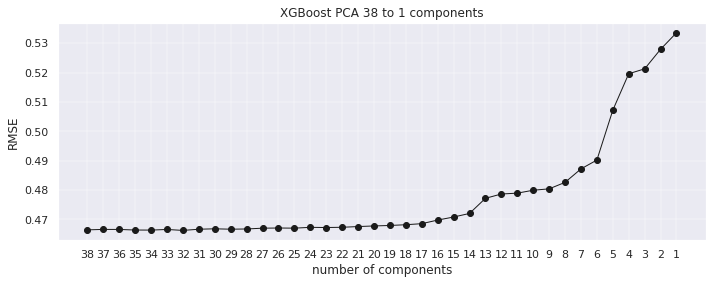

In [0]:
# Plot PCA Xgboost 38 to 1 components
x_axis = n_of_comps
y_axis = scores_pca

plt.figure()
plt.plot(x_axis,y_axis,'ko-',  linewidth=1)
plt.xlabel('number of components')
plt.ylabel('RMSE')
plt.title('XGBoost PCA 38 to 1 components')
plt.xticks(x_axis)
plt.tick_params(axis='x')
plt.gcf().subplots_adjust(left=0, right=1.5)
plt.gca().invert_xaxis()
plt.grid(linewidth = 0.4)
plt.show()
